# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 604


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"# YOUR CODE HERE

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()# YOUR CODE HERE

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]# YOUR CODE HERE
        city_lng = city_weather["coord"]["lon"]# YOUR CODE HERE
        city_max_temp = city_weather["main"]["temp_max"]# YOUR CODE HERE
        city_humidity = city_weather["main"]["humidity"]# YOUR CODE HERE
        city_clouds = city_weather["clouds"]["all"]# YOUR CODE HERE
        city_wind = city_weather["wind"]["speed"]# YOUR CODE HERE
        city_country = city_weather["sys"]["country"]# YOUR CODE HERE
        city_date = city_weather["dt"] # YOUR CODE HERE

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | waitangi
Processing Record 2 of Set 1 | georgetown
Processing Record 3 of Set 1 | margaret river
Processing Record 4 of Set 1 | kaa-khem
Processing Record 5 of Set 1 | albany
Processing Record 6 of Set 1 | papatowai
Processing Record 7 of Set 1 | badger
Processing Record 8 of Set 1 | gadzhiyevo
Processing Record 9 of Set 1 | port alfred
Processing Record 10 of Set 1 | west island
Processing Record 11 of Set 1 | hawaiian paradise park
Processing Record 12 of Set 1 | 'ohonua
City not found. Skipping...
Processing Record 13 of Set 1 | ribeira grande
Processing Record 14 of Set 1 | gaigeturi
Processing Record 15 of Set 1 | adamstown
Processing Record 16 of Set 1 | tomatlan
Processing Record 17 of Set 1 | padang
Processing Record 18 of Set 1 | tura
Processing Record 19 of Set 1 | hermanus
Processing Record 20 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 21 of Set 1 | hilo

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          583
Lat           583
Lng           583
Max Temp      583
Humidity      583
Cloudiness    583
Wind Speed    583
Country       583
Date          583
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,waitangi,-43.9535,-176.5597,13.79,91,100,2.68,NZ,1702330274
1,georgetown,5.4112,100.3354,26.08,97,20,1.54,MY,1702330697
2,margaret river,-33.9500,115.0667,15.59,72,0,4.31,AU,1702330270
3,kaa-khem,51.6833,94.7333,-34.22,97,89,1.00,RU,1702330708
4,albany,42.6001,-73.9662,2.98,74,12,5.81,US,1702330212


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,13.79,91,100,2.68,NZ,1702330274
1,georgetown,5.4112,100.3354,26.08,97,20,1.54,MY,1702330697
2,margaret river,-33.9500,115.0667,15.59,72,0,4.31,AU,1702330270
3,kaa-khem,51.6833,94.7333,-34.22,97,89,1.00,RU,1702330708
4,albany,42.6001,-73.9662,2.98,74,12,5.81,US,1702330212


In [26]:
date_run = time.gmtime(int(city_data_df.loc[city_data_df["City"] == "georgetown"]["Date"]))
print(f"{date_run[0]}")
#city_data_df.columns

2023


C:\Users\tpreg\AppData\Local\Temp\ipykernel_22868\1578500818.py:1: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  date_run = time.gmtime(int(city_data_df.loc[city_data_df["City"] == "georgetown"]["Date"]))


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

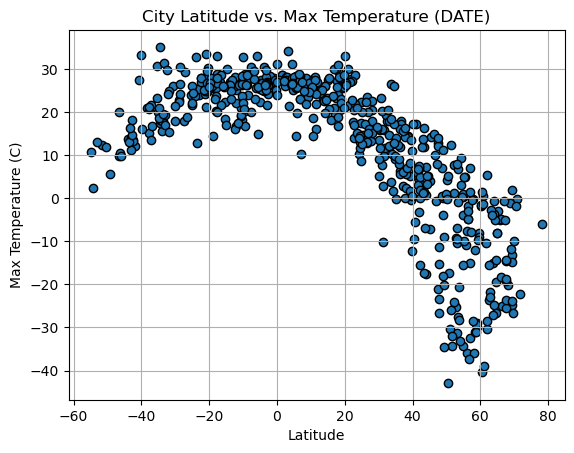

In [27]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black")

# Incorporate the other graph properties # YOUR CODE HERE
plt.title("City Latitude vs. Max Temperature (DATE)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

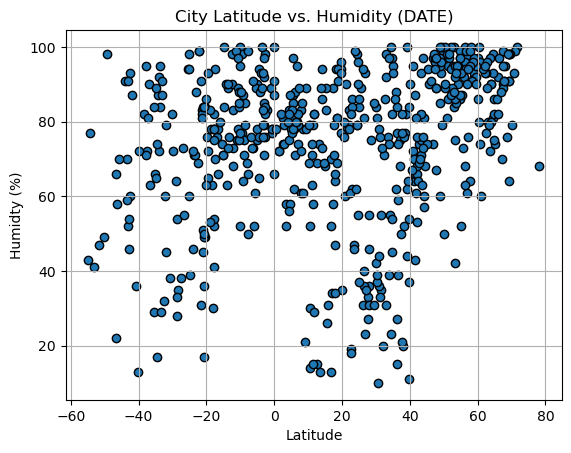

In [28]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (DATE)")
plt.xlabel("Latitude")
plt.ylabel("Humidty (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

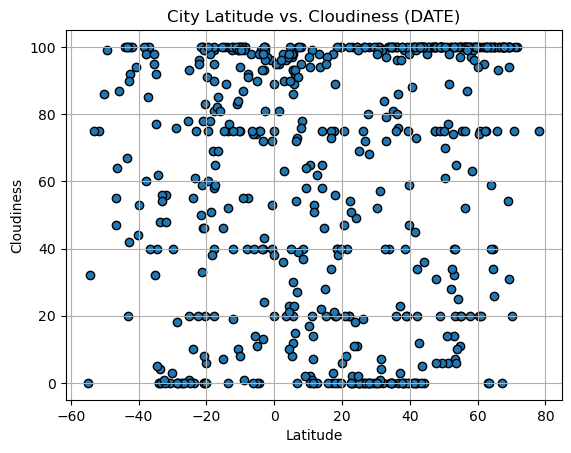

In [29]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (DATE)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

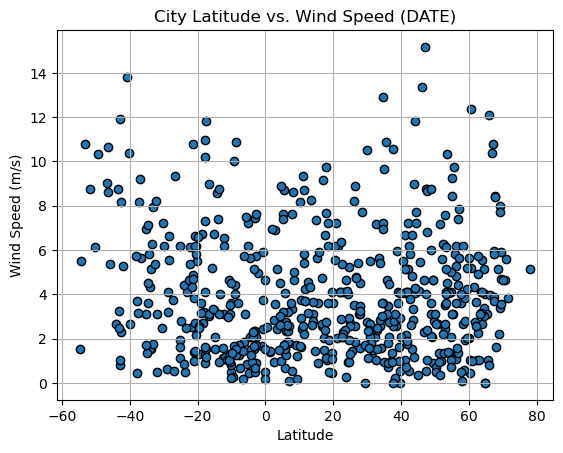

In [30]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (DATE)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [31]:
# Define a function to create Linear Regression plots
def lin_regress(x_vals, y_vals, y_label):
    (slope, intercept, rval, pval, stderr) = linregress(x_vals, y_vals)

    regress_vals = x_vals * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot best fit line 
    plt.scatter(x_vals, y_vals)
    plt.plot(x_vals,regress_vals,"r-")
    # Display regression line equation
    plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red",xycoords="figure points")

    plt.xlabel(f"Latitude")
    plt.ylabel(f"{y_label}")
    print(f"The r-value is: {rval}")
    plt.show()

In [32]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,georgetown,5.4112,100.3354,26.08,97,20,1.54,MY,1702330697
3,kaa-khem,51.6833,94.7333,-34.22,97,89,1.00,RU,1702330708
4,albany,42.6001,-73.9662,2.98,74,12,5.81,US,1702330212
6,badger,64.8000,-147.5333,-8.07,86,100,0.00,US,1702330289
7,gadzhiyevo,69.2551,33.3362,-13.17,91,94,7.98,RU,1702330281


In [33]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,13.79,91,100,2.68,NZ,1702330274
2,margaret river,-33.9500,115.0667,15.59,72,0,4.31,AU,1702330270
5,papatowai,-46.5619,169.4708,9.85,66,55,9.02,NZ,1702330284
8,port alfred,-33.5906,26.8910,17.88,95,4,1.51,ZA,1702330265
9,west island,-12.1568,96.8225,24.99,83,40,3.09,CC,1702330708


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8318994550796852


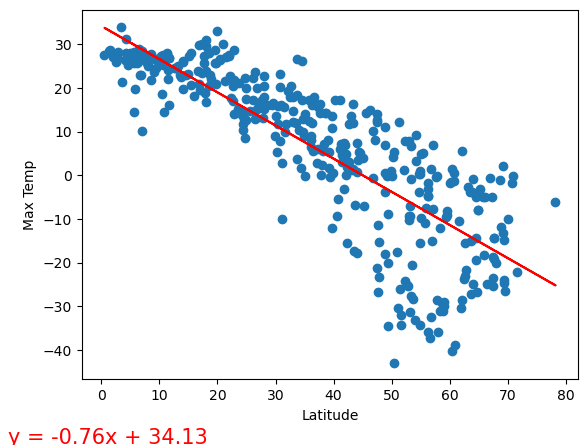

In [34]:
# Linear regression on Northern Hemisphere
lin_regress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Max Temp")

The r-value is: 0.5931274172055965


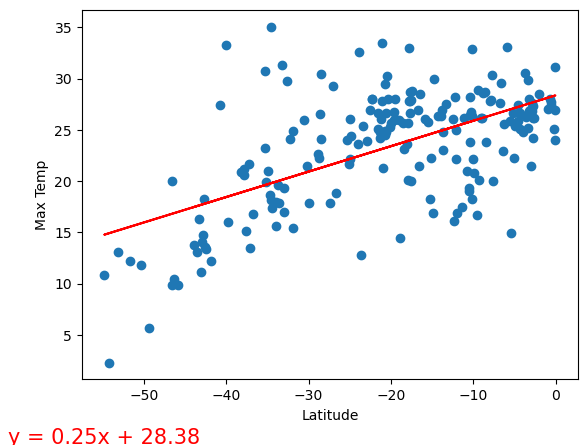

In [35]:
# Linear regression on Southern Hemisphere
lin_regress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Max Temp")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.34250654010575143


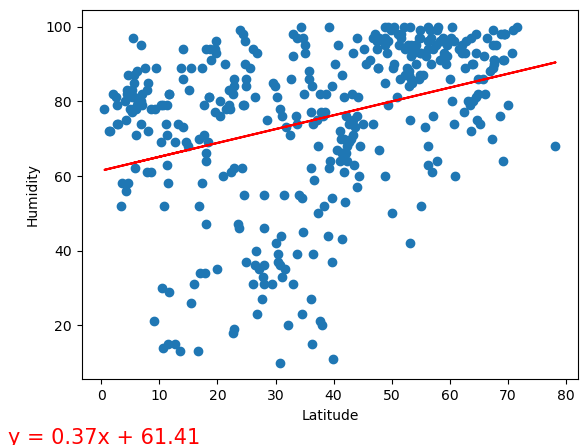

In [36]:
# Northern Hemisphere
lin_regress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Humidity")

The r-value is: 0.3640398993220604


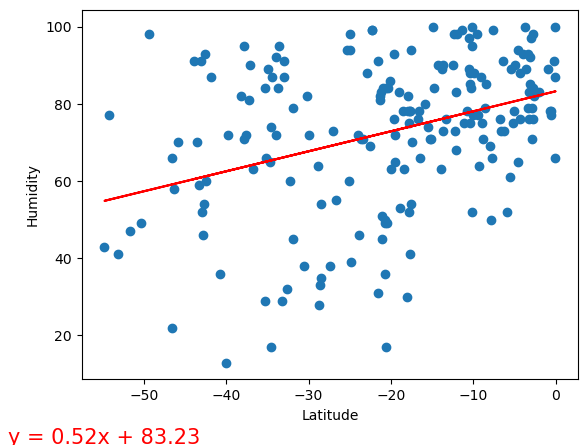

In [37]:
# Southern Hemisphere
lin_regress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Humidity")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.2551630310197214


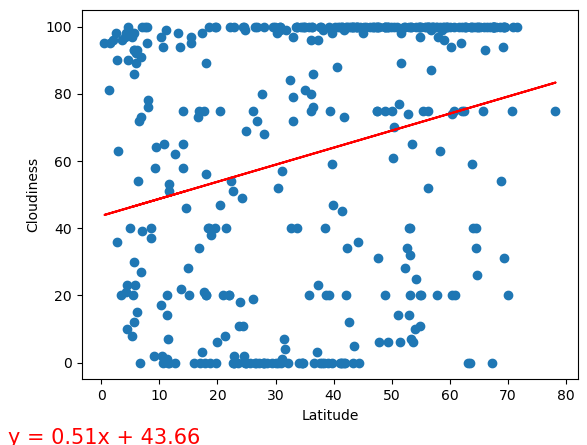

In [38]:
# Northern Hemisphere
lin_regress(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Cloudiness")

The r-value is: 0.11901950723422279


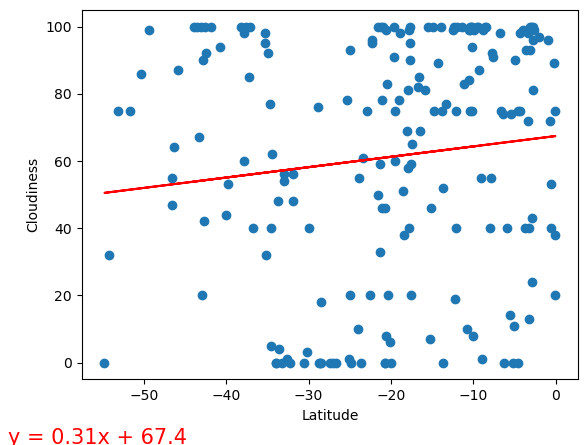

In [39]:
# Southern Hemisphere
lin_regress(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Cloudiness")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.10766483689788146


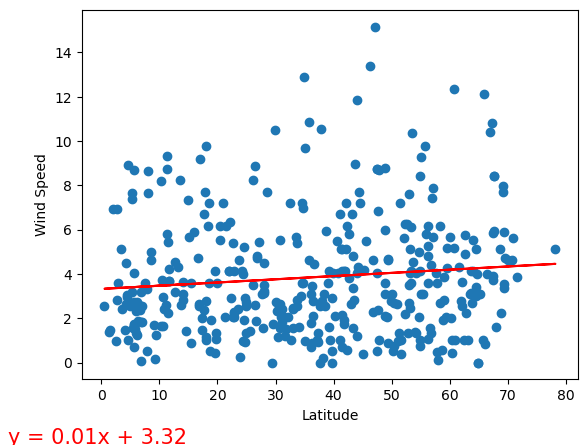

In [40]:
# Northern Hemisphere
lin_regress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Wind Speed")

The r-value is: -0.3347718084347357


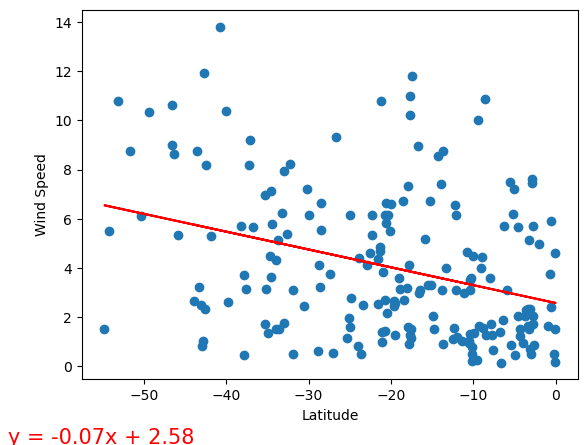

In [41]:
# Southern Hemisphere
lin_regress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Wind Speed")

**Discussion about the linear relationship:** YOUR RESPONSE HERE